In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import yt
%matplotlib inline

In [2]:
#import athena_read as ath
fdir =  '/tigress/jiming/reconnect/athena/bin/'
targ = 'x2y4z1r512pm1re16000/'
fname = fdir+targ+'Unstra.out2.00045.athdf'
fname = fdir+'t45box001'+'box.0000.vtk'
#time,data=ath.hdf5(fname)
ds = yt.load(fname)

yt : [WARNING  ] 2017-08-14 23:46:21,980 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2017-08-14 23:46:21,982 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2017-08-14 23:46:21,983 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2017-08-14 23:46:21,983 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2017-08-14 23:46:22,015 Parameters: current_time              = 141.371607789
yt : [INFO     ] 2017-08-14 23:46:22,016 Parameters: domain_dimensions         = [1024 1008  512]
yt : [INFO     ] 2017-08-14 23:46:22,017 Parameters: domain_left_edge          = [-1.  -2.  -0.5]
yt : [INFO     ] 2017-08-14 23:46:22,018 Parameters: domain_right_edge         = [ 1.   2.   0.5]
yt : [INFO     ] 2017-08-14 23:46:22,019 Parameters: cosmological_simulation   = 0.0


In [7]:
ad=ds.all_data()
x1 = ad[('athena_pp','x')]
print x1.shape

(528482304,)


In [13]:
ad[('athena_pp','vel1')].unit_quantity

1.0 code_length/code_time

In [25]:
ffield = 'athena_pp'
grad_fields = ds.add_gradient_fields((ffield,"rho"))
grad_fields = ds.add_gradient_fields((ffield,"vel1"))
grad_fields = ds.add_gradient_fields((ffield,"vel2"))
grad_fields = ds.add_gradient_fields((ffield,"vel3"))
grad_fields = ds.add_gradient_fields((ffield,"Bcc1"))
grad_fields = ds.add_gradient_fields((ffield,"Bcc2"))
grad_fields = ds.add_gradient_fields((ffield,"Bcc3"))

def _Jx(field, data):
    return data["Bcc3_gradient_y"]-data["Bcc2_gradient_z"]
def _Jy(field, data):
    return data["Bcc1_gradient_z"]-data["Bcc3_gradient_x"]
def _Jz(field, data):
    return data["Bcc2_gradient_x"]-data["Bcc1_gradient_y"]

Junit = 'code_magnetic/code_length'

ds.add_field((ffield,'Jx'), function=_Jx, take_log=False,units=Junit,
             display_name='Jx')
ds.add_field((ffield,'Jy'), function=_Jy, take_log=False,units=Junit,
             display_name='Jy')
ds.add_field((ffield,'Jz'), function=_Jz, take_log=False,units=Junit,
             display_name='Jz')

def _Jmag(field, data):
    return np.sqrt(data["Jx"]**2+data["Jy"]**2+data["Jz"]**2)
ds.add_field((ffield,'Jmag'), function=_Jmag, take_log=False,units=Junit,
             display_name='Jmag',force_override=True)

def _dVy(field, data):
    q=1.5
    omg =data.ds.quan(1.0,'1/code_time')
    return data['vel2']+q*omg*data['x']
ds.add_field((ffield,'dVy'), function=_dVy, take_log=False,units='code_length/code_time',
             display_name='dVy',force_override=True)

/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'


In [26]:
print ds.derived_field_list
# tmp = ds.all_data()
# ptmp['athena_pp','rho_gradient_magnitude']

[('athena_pp', u'Bcc1'), ('athena_pp', 'Bcc1_gradient_magnitude'), ('athena_pp', 'Bcc1_gradient_x'), ('athena_pp', 'Bcc1_gradient_y'), ('athena_pp', 'Bcc1_gradient_z'), ('athena_pp', u'Bcc2'), ('athena_pp', 'Bcc2_gradient_magnitude'), ('athena_pp', 'Bcc2_gradient_x'), ('athena_pp', 'Bcc2_gradient_y'), ('athena_pp', 'Bcc2_gradient_z'), ('athena_pp', u'Bcc3'), ('athena_pp', 'Bcc3_gradient_magnitude'), ('athena_pp', 'Bcc3_gradient_x'), ('athena_pp', 'Bcc3_gradient_y'), ('athena_pp', 'Bcc3_gradient_z'), ('athena_pp', 'Jmag'), ('athena_pp', 'Jx'), ('athena_pp', 'Jy'), ('athena_pp', 'Jz'), ('athena_pp', 'cell_volume'), ('athena_pp', 'dVy'), ('athena_pp', 'dx'), ('athena_pp', 'dy'), ('athena_pp', 'dz'), ('athena_pp', 'path_element_x'), ('athena_pp', 'path_element_y'), ('athena_pp', 'path_element_z'), ('athena_pp', u'rho'), ('athena_pp', 'rho_gradient_magnitude'), ('athena_pp', 'rho_gradient_x'), ('athena_pp', 'rho_gradient_y'), ('athena_pp', 'rho_gradient_z'), ('athena_pp', u'vel1'), ('athena

yt : [INFO     ] 2017-08-15 00:37:02,806 xlim = -0.500000 0.500000
yt : [INFO     ] 2017-08-15 00:37:02,807 ylim = -1.000000 1.000000
yt : [INFO     ] 2017-08-15 00:37:02,809 xlim = -0.500000 0.500000
yt : [INFO     ] 2017-08-15 00:37:02,809 ylim = -1.000000 1.000000
yt : [INFO     ] 2017-08-15 00:37:02,811 Making a fixed resolution buffer of (('athena_pp', 'Bcc1')) 800 by 800
yt : [INFO     ] 2017-08-15 00:37:03,166 Making a fixed resolution buffer of (('athena_pp', 'Jmag')) 800 by 800
yt : [INFO     ] 2017-08-15 00:37:03,202 Making a fixed resolution buffer of (('athena_pp', 'Bcc2')) 800 by 800
yt : [INFO     ] 2017-08-15 00:37:03,238 Making a fixed resolution buffer of (('athena_pp', 'vel1')) 800 by 800
yt : [INFO     ] 2017-08-15 00:37:03,274 Making a fixed resolution buffer of (('athena_pp', 'dVy')) 800 by 800
yt : [INFO     ] 2017-08-15 00:37:03,310 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2017-08-15 00:37:03,390 Plot image for field 

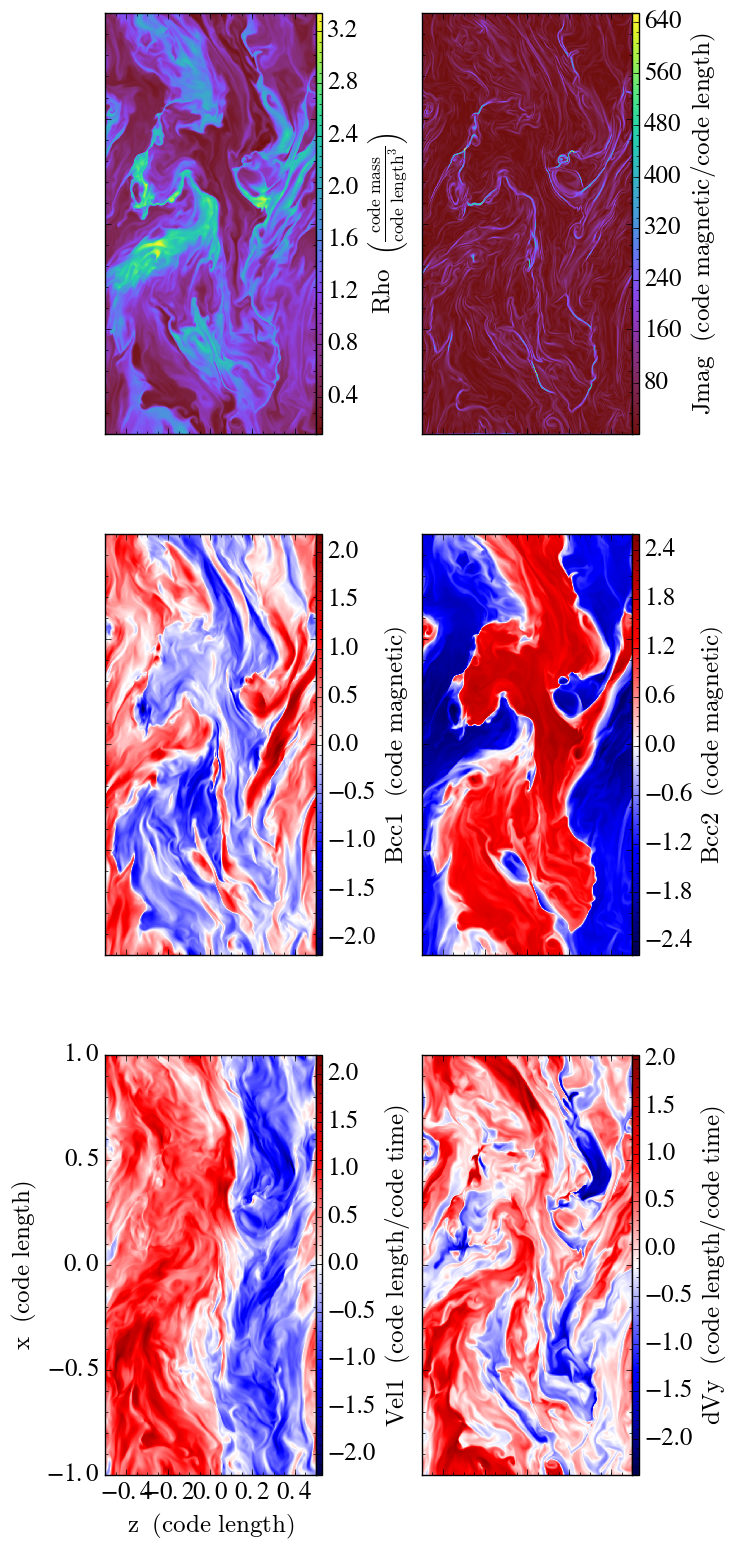

In [21]:
matplotlib.rcParams['figure.figsize'] = (6,6)
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure()
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (3, 2),
                axes_pad = 1.0,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")
ds.periodicity = (True, True, True)
fields = ['rho', 'Jmag', 'Bcc1', 'Bcc2','vel1','dVy']
s=yt.SlicePlot(ds,"y",fields,center=[0,1,0])

for f in fields:
  s.set_log(f,False)
for f in fields[2:]:
  s.set_cmap(f,'seismic')

# s.show()

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = s.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
s._setup_plots()


# # density_image is an 800x800 ImageArray instance
# image = s.frb['Jmag']
# # density_image is a 2D numpy array
# image = np.array(image)
# plt.imshow(image,origin='lower',extent=[-1,1,-0.5,0.5])

In [23]:
#import athena_read as ath
fdir =  '/tigress/jiming/reconnect/athena/bin/'
targ = 'x2y4z1r256ideal/'
fname = fdir+targ+'Unstra.out2.00045.athdf'
#time,data=ath.hdf5(fname)
ds = yt.load(fname)

yt : [WARNING  ] 2017-08-15 00:50:41,696 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2017-08-15 00:50:41,698 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2017-08-15 00:50:41,698 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2017-08-15 00:50:41,699 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2017-08-15 00:50:41,716 Parameters: current_time              = 141.371773554
yt : [INFO     ] 2017-08-15 00:50:41,716 Parameters: domain_dimensions         = [512 504 256]
yt : [INFO     ] 2017-08-15 00:50:41,717 Parameters: domain_left_edge          = [-1.  -2.  -0.5]
yt : [INFO     ] 2017-08-15 00:50:41,718 Parameters: domain_right_edge         = [ 1.   2.   0.5]
yt : [INFO     ] 2017-08-15 00:50:41,720 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-08-15 00:52:45,246 xlim = -0.500000 0.500000
yt : [INFO     ] 2017-08-15 00:52:45,247 ylim = -1.000000 1.000000
yt : [INFO     ] 2017-08-15 00:52:45,249 xlim = -0.500000 0.500000
yt : [INFO     ] 2017-08-15 00:52:45,250 ylim = -1.000000 1.000000
yt : [INFO     ] 2017-08-15 00:52:45,251 Making a fixed resolution buffer of (('athena_pp', 'Bcc1')) 800 by 800
yt : [INFO     ] 2017-08-15 00:52:45,361 Making a fixed resolution buffer of (('athena_pp', 'Jmag')) 800 by 800
yt : [INFO     ] 2017-08-15 00:52:45,380 Making a fixed resolution buffer of (('athena_pp', 'Bcc2')) 800 by 800
yt : [INFO     ] 2017-08-15 00:52:45,399 Making a fixed resolution buffer of (('athena_pp', 'vel1')) 800 by 800
yt : [INFO     ] 2017-08-15 00:52:45,419 Making a fixed resolution buffer of (('athena_pp', 'dVy')) 800 by 800
yt : [INFO     ] 2017-08-15 00:52:45,439 Making a fixed resolution buffer of (('athena_pp', 'rho')) 800 by 800
yt : [WARNING  ] 2017-08-15 00:52:45,473 Plot image for field 

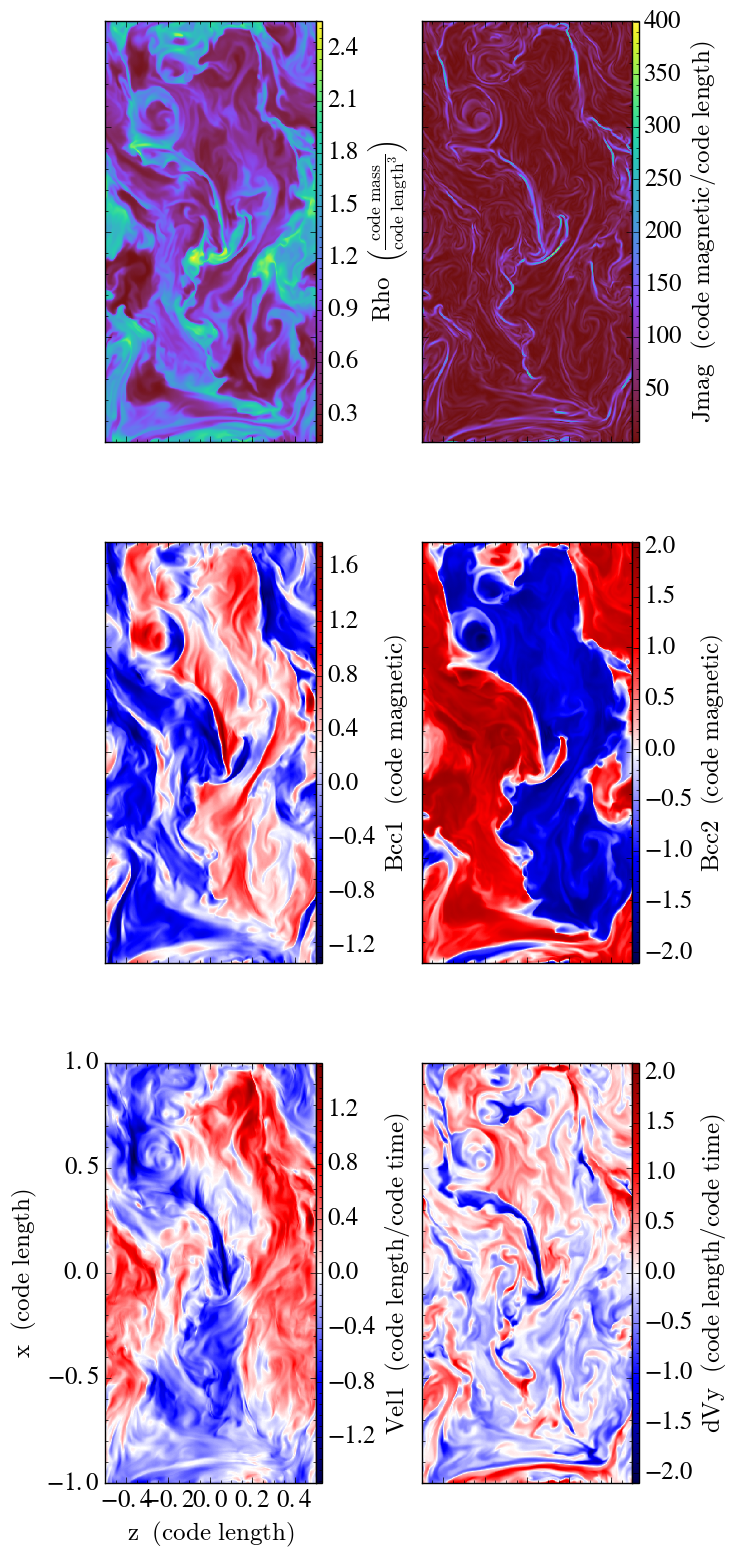

In [27]:
matplotlib.rcParams['figure.figsize'] = (6,6)
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure()
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (3, 2),
                axes_pad = 1.0,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")
ds.periodicity = (True, True, True)
fields = ['rho', 'Jmag', 'Bcc1', 'Bcc2','vel1','dVy']
s=yt.SlicePlot(ds,"y",fields,center=[0,1,0])

for f in fields:
  s.set_log(f,False)
for f in fields[2:]:
  s.set_cmap(f,'seismic')

# s.show()

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = s.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
s._setup_plots()


# # density_image is an 800x800 ImageArray instance
# image = s.frb['Jmag']
# # density_image is a 2D numpy array
# image = np.array(image)
# plt.imshow(image,origin='lower',extent=[-1,1,-0.5,0.5])